##Statistical Analysis

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

<Figure size 800x600 with 0 Axes>

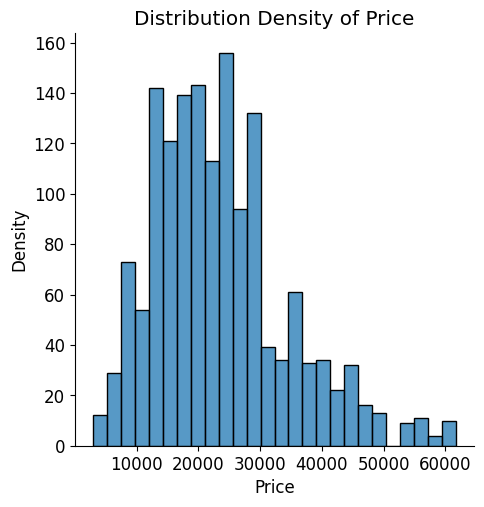

In [ ]:
variable_name = 'Price'
plt.figure(figsize=(8, 6))
sns.displot(proces_data[variable_name])
plt.title('Distribution Density of ' + variable_name)
plt.xlabel(variable_name)
plt.ylabel('Density')
plt.show()

In [ ]:
# from scipy.stats import shapiro, kstest
# import numpy as np

# variable_name = 'Price'

# # Extract the data from the DataFrame
# norm_data = proces_data[variable_name].dropna().to_numpy()

# # Shapiro-Wilk test
# shapiro_test_stat, shapiro_p_value = shapiro(data)
# print(f"Shapiro-Wilk Test - Test Statistic: {shapiro_test_stat}, p-value: {shapiro_p_value}")


There is not enough evidence to suggest that the distribution is normal, considering a p-value of 0.05 and a null-hypothesis that the data follows a normal distribution. The null hypothesis is rejected.

###Anova test

In [ ]:
# Mean of price by number of rooms
proces_data.groupby('No. of rooms')['Price'].mean()

No. of rooms
1.0    19984.737374
2.0    22320.217469
3.0    24854.430159
4.0    28133.065693
Name: Price, dtype: float64

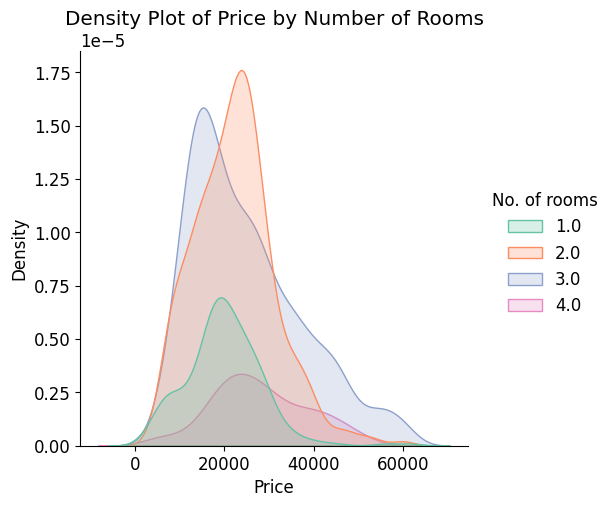

In [ ]:
#price means density depending on number of rooms
sns.displot(proces_data, x="Price", hue="No. of rooms", kind="kde", fill=True, palette = "Set2")
plt.title("Density Plot of Price by Number of Rooms")
plt.show()

In [ ]:
# Mean of price by number of bathrooms
proces_data.groupby('No. of bathrooms')['Price'].mean()

No. of bathrooms
1.0    19193.765799
2.0    22556.495695
3.0    27120.197917
4.0    30796.475410
5.0    27833.333333
6.0    15000.000000
7.0    23933.333333
Name: Price, dtype: float64

<ipython-input-55-0c422e3c2d15>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(proces_data, x="Price", hue="No. of bathrooms", kind="kde", fill=True, palette = "Set2")


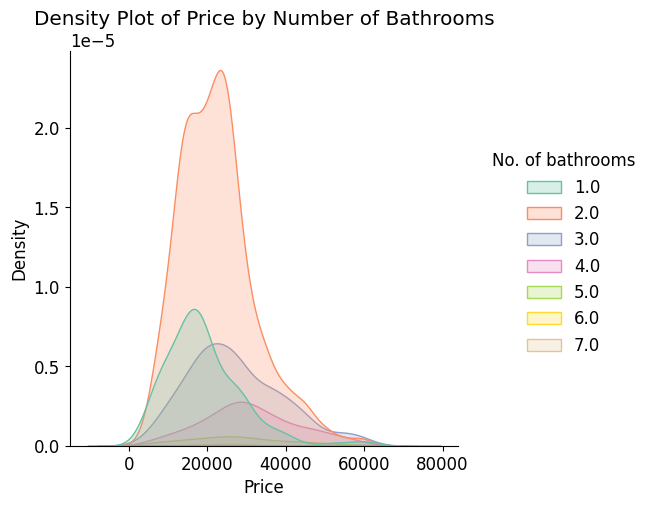

In [ ]:
#price means density depending on number of bathrooms
sns.displot(proces_data, x="Price", hue="No. of bathrooms", kind="kde", fill=True, palette = "Set2")
plt.title("Density Plot of Price by Number of Bathrooms")
plt.show()

In [ ]:
# Mean of price by Municipality
proces_data.groupby('Municipality')['Price'].mean()

Municipality
Guadalajara             25498.771894
Other                   15327.692308
Tlajomulco de Zúñiga    16794.780220
Tonalá                   7154.166667
Zapopan                 24310.971014
Name: Price, dtype: float64

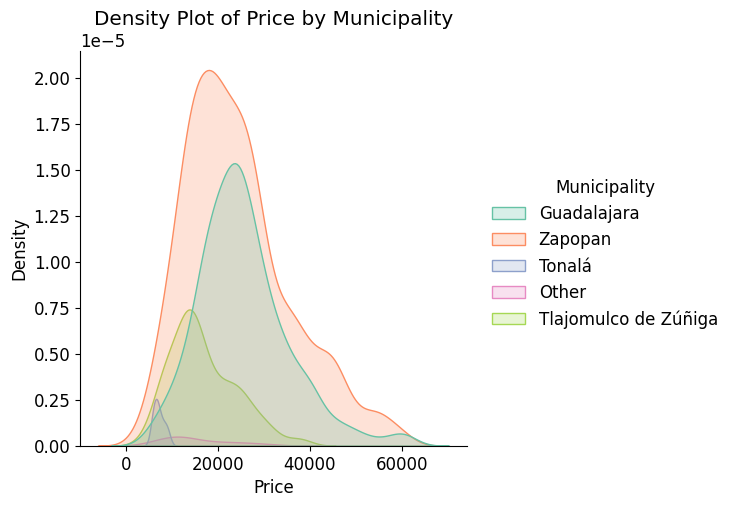

In [ ]:
#price means density depending on Municipality
sns.displot(proces_data, x="Price", hue="Municipality", kind="kde", fill=True, palette = "Set2")
plt.title("Density Plot of Price by Municipality")
plt.show()

In [ ]:
# Mean of price by property type
proces_data.groupby('Type')['Price'].mean()

Type
Department    24998.865654
House         21779.271642
Name: Price, dtype: float64

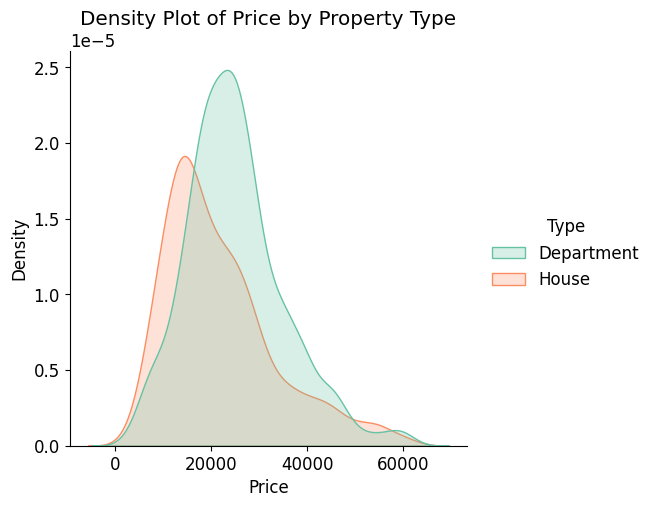

In [ ]:
#price means density depending on property type
sns.displot(proces_data, x="Price", hue="Type", kind="kde", fill=True, palette = "Set2")
plt.title("Density Plot of Price by Property Type")
plt.show()

1-way ANOVA

In [ ]:
#1-way ANOVA for Number of Rooms
from scipy.stats import f_oneway

one = proces_data[proces_data['No. of rooms']==1.0]
one_room = one['Price']

two = proces_data[proces_data['No. of rooms']==2.0]
two_room = two['Price']

three = proces_data[proces_data['No. of rooms']==3.0]
three_room = three['Price']

four = proces_data[proces_data['No. of rooms']==4.0]
four_room = four['Price']

# Are conformity means by partner_status different?
f_oneway(one_room,two_room, three_room, four_room)

# p-value < 0.05 : means are different

F_onewayResult(statistic=21.185808851697175, pvalue=1.9080526567723455e-13)

In [ ]:
#1-way ANOVA for Number of bathrooms
from scipy.stats import f_oneway

one = proces_data[proces_data['No. of bathrooms']==1.0]
one_room = one['Price']

two = proces_data[proces_data['No. of bathrooms']==2.0]
two_room = two['Price']

three = proces_data[proces_data['No. of bathrooms']==3.0]
three_room = three['Price']

four = proces_data[proces_data['No. of bathrooms']==4.0]
four_room = four['Price']

five = proces_data[proces_data['No. of bathrooms']==5.0]
five_room = five['Price']

six = proces_data[proces_data['No. of bathrooms']==6.0]
six_room = six['Price']

seven = proces_data[proces_data['No. of bathrooms']==7.0]
seven_room = seven['Price']

# Are conformity means by partner_status different?
f_oneway(one_room, two_room, three_room, four_room, five_room, six_room, seven_room)


F_onewayResult(statistic=25.3530639652296, pvalue=8.140284015739177e-29)

In [ ]:
#1-way ANOVA for Municipality
from scipy.stats import f_oneway

zapopan = proces_data[proces_data['Municipality']=="Zapopan"]
munip_zapopan = zapopan['Price']

gdl = proces_data[proces_data['Municipality']== "Guadalajara"]
munip_gdl = gdl['Price']

tlj = proces_data[proces_data['Municipality']== "Tlajomulco de Zúñiga"]
munip_tlj = tlj['Price']

tonala = proces_data[proces_data['Municipality']=="Tonalá"]
munip_tonala = tonala['Price']

other = proces_data[proces_data['Municipality']=="Other"]
munip_other = other['Price']

# Are conformity means by partner_status different?
f_oneway(munip_zapopan, munip_gdl, munip_tlj, munip_tonala, munip_other)

# p-value < 0.05 : means are different

F_onewayResult(statistic=33.453382681331476, pvalue=8.840160399956349e-27)

In [ ]:
#1-way ANOVA for property type
from scipy.stats import f_oneway

dept = proces_data[proces_data['Type']=="Department"]
type_dept = dept['Price']

house = proces_data[proces_data['Type']== "House"]
type_house = house['Price']

# Are conformity means by partner_status different?
f_oneway(type_dept, type_house)

# p-value < 0.05 : means are different

F_onewayResult(statistic=33.2544224207644, pvalue=9.772300367860451e-09)

In [ ]:
rename_data = proces_data

In [ ]:
rename_data = rename_data.rename(columns={"No. of rooms" :
                             "rooms"}) # make name pythonic

In [ ]:
rename_data = rename_data.rename(columns={"No. of bathrooms" :
                             "bathrooms"}) # make name pythonic

In [ ]:
rename_data.head()

,Location,Price,rooms,bathrooms,Area,Neighborhood,Municipality,Type,Price_per_sq_meter,Bathrooms_per_room
0,Calle Miguel de Cervantes Saavedra 382A,5310,1.0,1.0,12.0,Obrera,Guadalajara,Department,442.5,1.0
1,"Legacy Tower, Av Empresarios 62",5310,1.0,1.0,12.0,Obrera,Guadalajara,Department,442.5,1.0
2,NaN,2950,1.0,1.0,20.0,El Mante,Zapopan,Department,147.5,1.0
3,Punto Sur,2950,1.0,2.0,20.0,El Mante,Zapopan,Department,147.5,2.0
4,Arquitectos Norte 855,4930,1.0,1.0,25.0,Jardines Tepeyac,Zapopan,Department,197.2,1.0


In [ ]:
rename_data["bathrooms"].unique()

array([1., 2., 3., 4., 5., 6., 7.])

###Two-way ANOVA

Visualize means for Two-way ANOVA

In [ ]:
# Mean of price by number of rooms and number of bathrooms
rename_data.groupby(['rooms', 'bathrooms'])['Price'].mean()

rooms  bathrooms
1.0    1.0          19778.000000
       2.0          20154.040541
       3.0          17950.636364
       4.0          26773.333333
       5.0          32000.000000
2.0    1.0          18070.368421
       2.0          23348.585859
       3.0          24787.647059
       4.0          20641.666667
       5.0          25020.000000
3.0    1.0          19939.977778
       2.0          21891.169811
       3.0          28862.962963
       4.0          31970.967742
       5.0          22535.714286
       7.0          23400.000000
4.0    1.0          50000.000000
       2.0          25584.000000
       3.0          24357.037037
       4.0          32154.444444
       5.0          36240.000000
       6.0          15000.000000
       7.0          25000.000000
Name: Price, dtype: float64

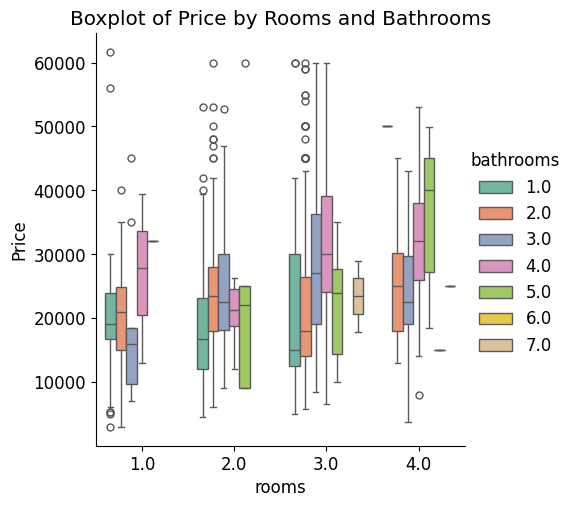

In [ ]:
sns.catplot(data=rename_data, x="rooms", y="Price", hue="bathrooms", kind="box", palette = "Set2")
plt.title("Boxplot of Price by Rooms and Bathrooms")
plt.show()

In [ ]:
# Mean of price by number of rooms and Municipality
rename_data.groupby(['rooms', 'Municipality'])['Price'].mean()

rooms  Municipality        
1.0    Guadalajara             21925.008475
       Other                   12300.000000
       Tlajomulco de Zúñiga     9500.000000
       Tonalá                   6000.000000
       Zapopan                 17979.541667
2.0    Guadalajara             24166.169492
       Other                   18080.000000
       Tlajomulco de Zúñiga    12110.344828
       Tonalá                   7405.000000
       Zapopan                 22383.859155
3.0    Guadalajara             31051.401869
       Other                   15080.000000
       Tlajomulco de Zúñiga    17157.438017
       Tonalá                   5800.000000
       Zapopan                 25839.235294
4.0    Guadalajara             30234.333333
       Tlajomulco de Zúñiga    22015.384615
       Zapopan                 29318.518519
Name: Price, dtype: float64

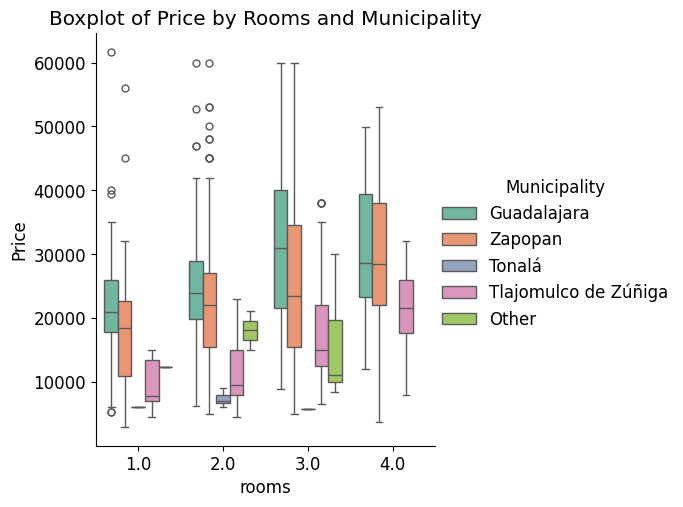

In [ ]:
sns.catplot(data=rename_data, x="rooms", y="Price", hue="Municipality", kind="box", palette = "Set2")
plt.title("Boxplot of Price by Rooms and Municipality")
plt.show()

In [ ]:
# Mean of price by number of rooms and property type
rename_data.groupby(['rooms', 'Type'])['Price'].mean()

rooms  Type      
1.0    Department    20627.502762
       House         13141.176471
2.0    Department    23679.342975
       House         13777.142857
3.0    Department    32650.270718
       House         21711.786192
4.0    Department    29495.000000
       House         28025.826772
Name: Price, dtype: float64

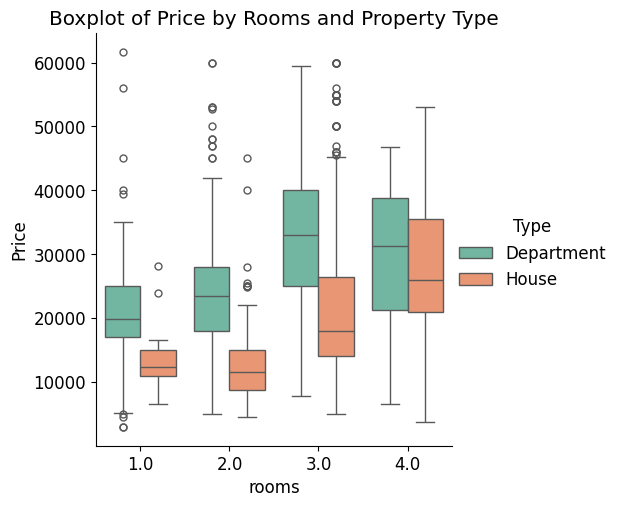

In [ ]:
sns.catplot(data=rename_data, x="rooms", y="Price", hue="Type", kind="box", palette = "Set2")
plt.title("Boxplot of Price by Rooms and Property Type")
plt.show()

In [ ]:
# Mean of price by number of bathrooms and municipality
rename_data.groupby(['bathrooms', 'Municipality'])['Price'].mean()

bathrooms  Municipality        
1.0        Guadalajara             21535.639640
           Other                   15000.000000
           Tlajomulco de Zúñiga     9970.000000
           Tonalá                   7250.000000
           Zapopan                 19017.045113
2.0        Guadalajara             25027.013793
           Other                   12826.000000
           Tlajomulco de Zúñiga    15454.368932
           Tonalá                   6835.714286
           Zapopan                 23108.404467
3.0        Guadalajara             31282.698630
           Other                   30000.000000
           Tlajomulco de Zúñiga    20101.612903
           Tonalá                   9000.000000
           Zapopan                 26729.835165
4.0        Guadalajara             32576.428571
           Other                   26000.000000
           Tlajomulco de Zúñiga    25304.545455
           Zapopan                 31981.176471
5.0        Guadalajara             43966.666667
        

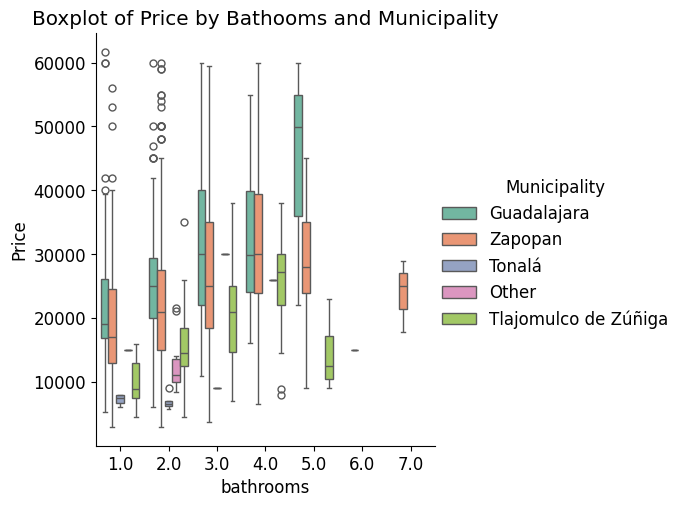

In [ ]:
sns.catplot(data=rename_data, x="bathrooms", y="Price", hue="Municipality", kind="box", palette = "Set2")
plt.title("Boxplot of Price by Bathooms and Municipality")
plt.show()

In [ ]:
# Mean of price by number of bathrooms and property type
rename_data.groupby(['bathrooms', 'Type'])['Price'].mean()

bathrooms  Type      
1.0        Department    20527.033654
           House         14647.540984
2.0        Department    24937.522244
           House         18397.743243
3.0        Department    31946.838384
           House         24591.957672
4.0        Department    32677.500000
           House         30236.170213
5.0        Department    39750.000000
           House         26000.000000
6.0        House         15000.000000
7.0        House         23933.333333
Name: Price, dtype: float64

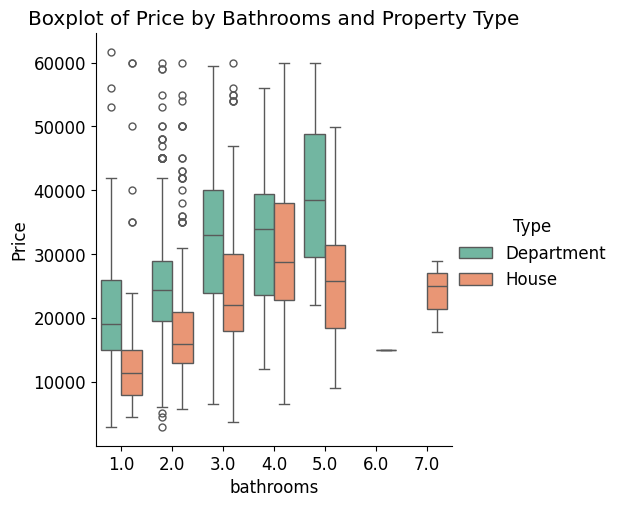

In [ ]:
sns.catplot(data=rename_data, x="bathrooms", y="Price", hue="Type", kind="box", palette = "Set2")
plt.title("Boxplot of Price by Bathrooms and Property Type")
plt.show()

In [ ]:
# Mean of price by municipality and property type
rename_data.groupby(['Municipality', 'Type'])['Price'].mean()

Municipality          Type      
Guadalajara           Department    25419.123188
                      House         25927.012987
Other                 Department    21500.000000
                      House         14813.333333
Tlajomulco de Zúñiga  Department    15714.285714
                      House         16884.821429
Tonalá                Department     6937.500000
                      House          7587.500000
Zapopan               Department    25247.045346
                      House         23352.009780
Name: Price, dtype: float64

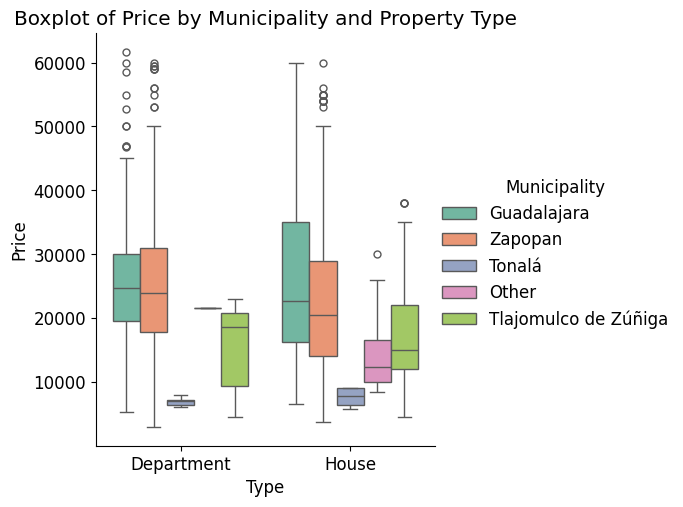

In [ ]:
sns.catplot(data=rename_data, x="Type", y="Price", hue="Municipality", kind="box", palette = "Set2")
plt.title("Boxplot of Price by Municipality and Property Type")
plt.show()

_________________________________________________

2-Way ANOVA

In [ ]:
# Train an Ordinary Least Squares model with with two variables (number of rooms and number of bathrooms)
model = ols('Price ~ C(rooms, Sum)*C(bathrooms, Sum)',
                 data=rename_data).fit()

In [ ]:
#two-way ANOVA test
table = sm.stats.anova_lm(model, typ=2) # Type 2 Anova DataFrame
print(table)

                                       sum_sq      df            F  \
C(rooms, Sum)                    1.411079e+08     3.0     0.444852   
C(bathrooms, Sum)                9.065041e+11     6.0  1428.908054   
C(rooms, Sum):C(bathrooms, Sum)  9.027592e+09    18.0     4.743350   
Residual                         1.589180e+11  1503.0          NaN   

                                       PR(>F)  
C(rooms, Sum)                    7.209790e-01  
C(bathrooms, Sum)                0.000000e+00  
C(rooms, Sum):C(bathrooms, Sum)  5.917204e-10  
Residual                                  NaN  


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  warnings.warn('covariance of constraints does not have full '


In [ ]:
# Train an Ordinary Least Squares model with with two variables (number of rooms and Municipality)
model2 = ols('Price ~ C(rooms, Sum)*C(Municipality, Sum)',
                 data=rename_data).fit()

In [ ]:
#two-way ANOVA test
table = sm.stats.anova_lm(model2, typ=2) # Type 2 Anova DataFrame
print(table)

                                          sum_sq      df           F  \
C(rooms, Sum)                       1.391932e+10     3.0   45.673893   
C(Municipality, Sum)                1.291952e+11     4.0  317.949166   
C(rooms, Sum):C(Municipality, Sum)  1.167352e+09    12.0    0.957617   
Residual                            1.531899e+11  1508.0         NaN   

                                           PR(>F)  
C(rooms, Sum)                        2.992285e-28  
C(Municipality, Sum)                1.852765e-198  
C(rooms, Sum):C(Municipality, Sum)   4.878118e-01  
Residual                                      NaN  


In [ ]:
# Train an Ordinary Least Squares model with with two variables (number of rooms and property type)
model3 = ols('Price ~ C(rooms, Sum)*C(Type, Sum)',
                 data=rename_data).fit()

In [ ]:
#two-way ANOVA test
table = sm.stats.anova_lm(model3, typ=2) # Type 2 Anova DataFrame
print(table)

                                  sum_sq      df           F        PR(>F)
C(rooms, Sum)               2.536963e+10     3.0   84.297863  1.901347e-50
C(Type, Sum)                2.195251e+10     1.0  218.830484  2.336041e-46
C(rooms, Sum):C(Type, Sum)  8.870155e+08     3.0    2.947363  3.179185e-02
Residual                    1.522818e+11  1518.0         NaN           NaN


In [ ]:
# Train an Ordinary Least Squares model with with two variables (number of bathrooms and Municipality)
model4 = ols('Price ~ C(bathrooms, Sum)*C(Municipality, Sum)',
                 data=rename_data).fit()

In [ ]:
#two-way ANOVA test
table = sm.stats.anova_lm(model4, typ=2) # Type 2 Anova DataFrame
print(table)

                                              sum_sq      df           F  \
C(bathrooms, Sum)                       3.523915e+11     6.0  599.221717   
C(Municipality, Sum)                    1.935937e+09     4.0    4.937927   
C(bathrooms, Sum):C(Municipality, Sum)  5.084432e+10    24.0   21.614468   
Residual                                1.472165e+11  1502.0         NaN   

                                              PR(>F)  
C(bathrooms, Sum)                       0.000000e+00  
C(Municipality, Sum)                    5.891713e-04  
C(bathrooms, Sum):C(Municipality, Sum)  1.023429e-68  
Residual                                         NaN  


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 20
  warnings.warn('covariance of constraints does not have full '


In [ ]:
# Train an Ordinary Least Squares model with with two variables (number of bathrooms and property type)
model5 = ols('Price ~ C(bathrooms, Sum)*C(Type, Sum)',
                 data=rename_data).fit()

In [ ]:
#two-way ANOVA test
table = sm.stats.anova_lm(model5, typ=2) # Type 2 Anova DataFrame
print(table)

                                      sum_sq      df            F  \
C(bathrooms, Sum)               6.699527e+11     6.0  1113.291283   
C(Type, Sum)                    1.238912e+10     1.0   123.525409   
C(bathrooms, Sum):C(Type, Sum)  3.347645e+09     6.0     5.562936   
Residual                        1.518483e+11  1514.0          NaN   

                                      PR(>F)  
C(bathrooms, Sum)               0.000000e+00  
C(Type, Sum)                    1.214825e-27  
C(bathrooms, Sum):C(Type, Sum)  1.021738e-05  
Residual                                 NaN  


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [ ]:
# Train an Ordinary Least Squares model with with two variables (Municipality and property type)
model6 = ols('Price ~ C(Municipality, Sum)*C(Type, Sum)',
                 data=rename_data).fit()

In [ ]:
#two-way ANOVA test
table = sm.stats.anova_lm(model6, typ=2) # Type 2 Anova DataFrame
print(table)

                                         sum_sq      df          F  \
C(Municipality, Sum)               1.127766e+10     4.0  25.615398   
C(Type, Sum)                       4.212409e+08     1.0   3.827123   
C(Municipality, Sum):C(Type, Sum)  3.988736e+08     4.0   0.905977   
Residual                           1.668619e+11  1516.0        NaN   

                                         PR(>F)  
C(Municipality, Sum)               1.446978e-20  
C(Type, Sum)                       5.061280e-02  
C(Municipality, Sum):C(Type, Sum)  4.595763e-01  
Residual                                    NaN  


In [ ]:
data_final = rename_data